# <<Food Panda SG 2025>>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

In [92]:
# pip install plotly

# Importing the dataset

In [93]:
raw_df = pd.read_csv("SG_OnlineFoodPanda_2025.csv", delimiter=',')

In [94]:
raw_df.head()

,StoreId,CompleteStoreName,FoodType,AverageRating,Reviewers,City,Location
0,a04x,Peng Cheng Northern Jiangsu Cuisine 彭城小厨 (Temp...,Chinese,4.9,169,singapore,"45 Temple Street, Ground Floor,"
1,a0bn,Shu Liu Xiang 蜀留香 (Woodlands MRT),Chinese,5.0,285,singapore,"30 Woodlands Ave 2, 01-10 Woodlands MRT Statio..."
2,a0gk,NYP Chicken Rice (Nanyang Polytechnic),Chicken,4.9,509,singapore,"180 Ang Mo Kio Avenue 8, Nanyang Polytechnic B..."
3,a0il,Sumo Bar Happy (Middle Road) [Pandago],Japanese,5.0,11,singapore,"111 Middle Road 01-05,"
4,a0iu,King Dae Bak Korean (Compass One),Korean,4.9,15,singapore,"1 Sengkang Square, #04-11 Compass One, S 545078,"


In [95]:
raw_df.shape

(8313, 7)

In [96]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8313 entries, 0 to 8312
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StoreId            8313 non-null   object 
 1   CompleteStoreName  8313 non-null   object 
 2   FoodType           7451 non-null   object 
 3   AverageRating      8313 non-null   float64
 4   Reviewers          8313 non-null   int64  
 5   City               8313 non-null   object 
 6   Location           8313 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 454.7+ KB


In [97]:
raw_df.describe()

,AverageRating,Reviewers
count,8313.000000,8313.000000
mean,3.770516,339.896788
std,1.985423,854.635027
min,0.000000,0.000000
25%,4.100000,7.000000
50%,4.900000,56.000000
75%,4.900000,288.000000
max,5.000000,14329.000000


# Cleaning the Dataset

In [98]:
raw_df.head()

,StoreId,CompleteStoreName,FoodType,AverageRating,Reviewers,City,Location
0,a04x,Peng Cheng Northern Jiangsu Cuisine 彭城小厨 (Temp...,Chinese,4.9,169,singapore,"45 Temple Street, Ground Floor,"
1,a0bn,Shu Liu Xiang 蜀留香 (Woodlands MRT),Chinese,5.0,285,singapore,"30 Woodlands Ave 2, 01-10 Woodlands MRT Statio..."
2,a0gk,NYP Chicken Rice (Nanyang Polytechnic),Chicken,4.9,509,singapore,"180 Ang Mo Kio Avenue 8, Nanyang Polytechnic B..."
3,a0il,Sumo Bar Happy (Middle Road) [Pandago],Japanese,5.0,11,singapore,"111 Middle Road 01-05,"
4,a0iu,King Dae Bak Korean (Compass One),Korean,4.9,15,singapore,"1 Sengkang Square, #04-11 Compass One, S 545078,"


In [99]:
cols_to_drop = [col for col in ['StoreId', 'Location'] if col in raw_df.columns]
raw_df.drop(columns=cols_to_drop, inplace=True)

In [100]:
print(raw_df.columns)


Index(['CompleteStoreName', 'FoodType', 'AverageRating', 'Reviewers', 'City'], dtype='object')


In [101]:
# Checking for Null records
raw_df.isnull().sum()

CompleteStoreName      0
FoodType             862
AverageRating          0
Reviewers              0
City                   0
dtype: int64

In [102]:
# Checking for a null row
raw_df[raw_df['FoodType'].isnull()]

,CompleteStoreName,FoodType,AverageRating,Reviewers,City
6,Zhong Ji Dang Gui HK Roasted Delight 忠记当归港式烧腊 ...,NaN,0.0,0,singapore
12,Bangla Bondhu (Mandarin Gardens) - Islandwide,NaN,0.0,0,singapore
51,Hong Lim Crispy Curry Puff (Punggol Settlement),NaN,4.4,5,singapore
59,A.S.M - An Ice Cream Shop (Tampines),NaN,0.0,0,singapore
105,Hakka Leipopo (Anchorvale Village),NaN,4.9,54,singapore
...,...,...,...,...,...
8286,Lucky Souvlaki by Blu Kouzina (Hong Kong St),NaN,0.0,0,singapore
8289,Nong Han Thai (Bukit Gombak Vista),NaN,4.4,11,singapore
8295,Nanyang chefs (1 Anchorvale),NaN,0.0,0,singapore
8297,Lucky Cat Seafood Bar (Cuppage Terrace),NaN,0.0,0,singapore


In [103]:
# Droping the above row from the dataset (Tryied one coulmn)
raw_df = raw_df.drop(labels=6, axis=0)

In [104]:
# Checking for a null row
raw_df[raw_df['FoodType'].isnull()]

,CompleteStoreName,FoodType,AverageRating,Reviewers,City
12,Bangla Bondhu (Mandarin Gardens) - Islandwide,NaN,0.0,0,singapore
51,Hong Lim Crispy Curry Puff (Punggol Settlement),NaN,4.4,5,singapore
59,A.S.M - An Ice Cream Shop (Tampines),NaN,0.0,0,singapore
105,Hakka Leipopo (Anchorvale Village),NaN,4.9,54,singapore
118,Wang Fu Dim Sum 王府上海点心 (Fusionopolis Galaxis),NaN,4.9,308,singapore
...,...,...,...,...,...
8286,Lucky Souvlaki by Blu Kouzina (Hong Kong St),NaN,0.0,0,singapore
8289,Nong Han Thai (Bukit Gombak Vista),NaN,4.4,11,singapore
8295,Nanyang chefs (1 Anchorvale),NaN,0.0,0,singapore
8297,Lucky Cat Seafood Bar (Cuppage Terrace),NaN,0.0,0,singapore


In [105]:
# To drop all rows where FoodType is null: (becoz so many null values under Food Type)
raw_df = raw_df.dropna(subset=['FoodType'])


In [106]:
# Checking for a null row
raw_df[raw_df['FoodType'].isnull()]

,CompleteStoreName,FoodType,AverageRating,Reviewers,City


In [107]:
raw_df.columns = raw_df.columns.str.strip()
print(raw_df['FoodType'])

0        Chinese
1        Chinese
2        Chicken
3       Japanese
4         Korean
          ...   
8308     Noodles
8309     Dessert
8310     Chinese
8311       Asian
8312     Chinese
Name: FoodType, Length: 7451, dtype: object


In [108]:
print(raw_df.isnull().sum())


CompleteStoreName    0
FoodType             0
AverageRating        0
Reviewers            0
City                 0
dtype: int64


# Converting the DataTypes of numerical columns to numeric dataype if any

In [109]:
raw_df['AverageRating']

0       4.9
1       5.0
2       4.9
3       5.0
4       4.9
       ... 
8308    4.8
8309    4.9
8310    4.6
8311    4.6
8312    5.0
Name: AverageRating, Length: 7451, dtype: float64

In [110]:
raw_df['AverageRating'].value_counts()

4.9    2184
5.0    1867
0.0    1392
4.8     772
4.7     395
4.6     194
4.5     133
4.4      88
4.2      64
4.3      57
4.1      51
4.0      31
3.8      31
3.9      28
3.7      26
3.5      16
3.0      14
3.6      13
3.1      10
3.3       9
3.2       8
3.4       8
2.1       7
2.2       7
2.3       5
2.0       5
2.8       4
1.9       4
2.9       3
1.6       3
1.0       3
2.4       3
1.2       3
2.7       3
1.8       2
1.5       2
2.5       2
1.4       2
1.1       1
1.7       1
Name: AverageRating, dtype: int64

In [111]:
raw_df['Reviewers'].value_counts()

0       1392
5        121
6        116
8         93
7         90
        ... 
1348       1
2565       1
2391       1
2052       1
722        1
Name: Reviewers, Length: 1448, dtype: int64

In [112]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7451 entries, 0 to 8312
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompleteStoreName  7451 non-null   object 
 1   FoodType           7451 non-null   object 
 2   AverageRating      7451 non-null   float64
 3   Reviewers          7451 non-null   int64  
 4   City               7451 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 349.3+ KB


In [81]:
# Checking info of all the columns
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7451 entries, 0 to 8312
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompleteStoreName  7451 non-null   object 
 1   FoodType           7451 non-null   object 
 2   AverageRating      7451 non-null   float64
 3   Reviewers          7451 non-null   int64  
 4   City               7451 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 349.3+ KB


# Removing the  records whose AverageRating or Reviewers  is 0

In [113]:
raw_df.head()

,CompleteStoreName,FoodType,AverageRating,Reviewers,City
0,Peng Cheng Northern Jiangsu Cuisine 彭城小厨 (Temp...,Chinese,4.9,169,singapore
1,Shu Liu Xiang 蜀留香 (Woodlands MRT),Chinese,5.0,285,singapore
2,NYP Chicken Rice (Nanyang Polytechnic),Chicken,4.9,509,singapore
3,Sumo Bar Happy (Middle Road) [Pandago],Japanese,5.0,11,singapore
4,King Dae Bak Korean (Compass One),Korean,4.9,15,singapore


In [114]:
# Finding those restaurant whose has 0 Rating or Votes
useless_data = (raw_df['AverageRating'] == 0.0) | (raw_df['Reviewers'] == 0)
raw_df[useless_data]

,CompleteStoreName,FoodType,AverageRating,Reviewers,City
5,Rong Cheng Mala Xiang Guo (Ang Mo Kio Avenue 4),Mala Xiang Guo,0.0,0,singapore
13,Wareong Sedap Special Ayam Penyet (Tagore Lane),Indonesian,0.0,0,singapore
15,Curry Paradise Indian Muslim Food (Jalan Bukit...,Indian,0.0,0,singapore
20,The Bark Cafe (1000 Upper Changi Rd North) - I...,Western,0.0,0,singapore
29,CHEN DE MALA HOTPOT 晨的麻辣香锅,Chinese,0.0,0,singapore
...,...,...,...,...,...
8283,SSAK3 Korean BBQ & Bistro (Bras Basah Complex)...,Korean,0.0,0,singapore
8284,Mei Xi Yong Tau Foo (Bidadari Park Drive),Asian,0.0,0,singapore
8292,Peng Cheng Northern Jiangsu Cuisine 彭城小厨 (Temp...,Chinese,0.0,0,singapore
8293,Tree Side Nasi Lemak (Balestier),Asian,0.0,0,singapore


In [115]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
raw_df = raw_df[~useless_data]

In [116]:
raw_df

,CompleteStoreName,FoodType,AverageRating,Reviewers,City
0,Peng Cheng Northern Jiangsu Cuisine 彭城小厨 (Temp...,Chinese,4.9,169,singapore
1,Shu Liu Xiang 蜀留香 (Woodlands MRT),Chinese,5.0,285,singapore
2,NYP Chicken Rice (Nanyang Polytechnic),Chicken,4.9,509,singapore
3,Sumo Bar Happy (Middle Road) [Pandago],Japanese,5.0,11,singapore
4,King Dae Bak Korean (Compass One),Korean,4.9,15,singapore
...,...,...,...,...,...
8308,Sarawak Noodle (Jalan Besar),Noodles,4.8,81,singapore
8309,Makan Melaka (Haig Road),Dessert,4.9,57,singapore
8310,La Jia Restaurant (Bugis/City Hall),Chinese,4.6,5,singapore
8311,Gou La Ma? Mala Hotpot 够辣麻? (Toa Payoh Mall),Asian,4.6,6,singapore


# Working on 'FoodType' and Column (unique Value)

In [117]:
# Checking the unique values in the column
raw_df['FoodType'].value_counts()

Chinese                 984
Indian                  514
Asian                   501
Western                 311
Japanese                297
Noodles                 268
Singaporean             231
Dessert                 201
Thai                    192
Malaysian               166
Korean                  160
Seafood                 148
Beverages               125
Chicken                 123
Rice Dishes             115
Pizza                   106
Cakes                   104
Soups                   101
Indonesian               96
Chicken Rice             83
Coffee                   82
Vegetarian               79
Vietnamese               76
Bubble Tea               67
Bakery                   66
Pasta                    65
American                 61
Mala Xiang Guo           56
Fried Rice               53
Healthy                  51
Italian                  47
Porridge                 43
Middle Eastern           38
Fried Chicken            38
Mexican                  36
Sandwiches          

# Working on 'CompleteStoreName' Column

In [118]:
raw_df['CompleteStoreName'].value_counts()

Peng Cheng Northern Jiangsu Cuisine 彭城小厨 (Temple Street)    1
Second Serving (Tai Seng Point) - Islandwide                1
Greendot (Westgate)                                         1
Lucca'S Trattoria (Nostalgia Hotel)                         1
Baker'S Brew Studio (Paragon)                               1
                                                           ..
Francesca's (313@Somerset)                                  1
Yen Izakaya Premium 円居酒屋 (Tyrwhitt Road)                    1
Saigon Legend (Raffles Quay)                                1
Skosh - Onigiri, Sando & Matcha (NAFA)                      1
Oriental Chinese 东方美食武吉士店 (Liang Seah Street)               1
Name: CompleteStoreName, Length: 6059, dtype: int64

In [119]:
raw_df['CompleteStoreName'] = (
    raw_df['CompleteStoreName']
    .str.replace(r"\s*\(.*?\)", "", regex=True)  # Remove anything in parentheses
    .str.replace(r"\s*-\s*.*", "", regex=True)   # Remove ' - anything'
    .str.strip()  # Remove extra spaces
)

In [120]:
raw_df['CompleteStoreName'].value_counts()

Al                           20
A                             6
Red Lantern Seafood           5
D'Penyetz                     4
TamJai SamGor Mixian          4
                             ..
Jin Jiak Ho Grill Western     1
Fry Shack                     1
Easy Eatz Sg – Home           1
Japanese Food                 1
Oriental Chinese 东方美食武吉士店     1
Name: CompleteStoreName, Length: 5133, dtype: int64

In [121]:
raw_df['CompleteStoreName'] = raw_df['CompleteStoreName'].str.extract(r'^([A-Za-z0-9\'\s&]+)', expand=False).str.strip()


In [122]:
raw_df['CompleteStoreName'].value_counts()

Al                           20
Mr                            6
A                             6
Red Lantern Seafood           5
O                             5
                             ..
Jin Jiak Ho Grill Western     1
Fry Shack                     1
Easy Eatz Sg                  1
Japanese Food                 1
Oriental Chinese              1
Name: CompleteStoreName, Length: 5008, dtype: int64

In [123]:
raw_df

,CompleteStoreName,FoodType,AverageRating,Reviewers,City
0,Peng Cheng Northern Jiangsu Cuisine,Chinese,4.9,169,singapore
1,Shu Liu Xiang,Chinese,5.0,285,singapore
2,NYP Chicken Rice,Chicken,4.9,509,singapore
3,Sumo Bar Happy,Japanese,5.0,11,singapore
4,King Dae Bak Korean,Korean,4.9,15,singapore
...,...,...,...,...,...
8308,Sarawak Noodle,Noodles,4.8,81,singapore
8309,Makan Melaka,Dessert,4.9,57,singapore
8310,La Jia Restaurant,Chinese,4.6,5,singapore
8311,Gou La Ma,Asian,4.6,6,singapore


# Removing Duplicate records

In [124]:
# Finding all the duplicate rows
raw_df[raw_df.duplicated()]

,CompleteStoreName,FoodType,AverageRating,Reviewers,City


# Copying the cleaned data into a new DataFrame

In [125]:
foodpanda_df = raw_df.copy()

In [126]:
foodpanda_df.head()

,CompleteStoreName,FoodType,AverageRating,Reviewers,City
0,Peng Cheng Northern Jiangsu Cuisine,Chinese,4.9,169,singapore
1,Shu Liu Xiang,Chinese,5.0,285,singapore
2,NYP Chicken Rice,Chicken,4.9,509,singapore
3,Sumo Bar Happy,Japanese,5.0,11,singapore
4,King Dae Bak Korean,Korean,4.9,15,singapore


# Performing Exploratory Data Analysis

# People in singapore Indian food Review

In [127]:
indian_df = raw_df[(raw_df['FoodType'].str.lower() == 'indian') & (raw_df['City'].str.lower() == 'singapore')]


In [128]:
total_reviewers_indian = indian_df['Reviewers'].sum()
print("Total reviewers for Indian food in Singapore:", total_reviewers_indian)


Total reviewers for Indian food in Singapore: 334950


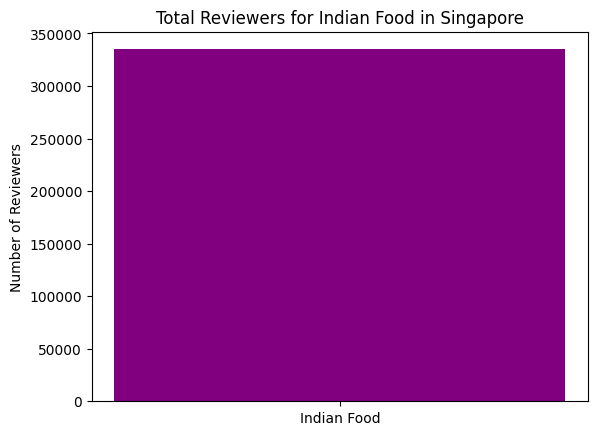

In [129]:
import matplotlib.pyplot as plt

plt.bar(['Indian Food'], [total_reviewers_indian], color='purple')
plt.title('Total Reviewers for Indian Food in Singapore')
plt.ylabel('Number of Reviewers')
plt.show()


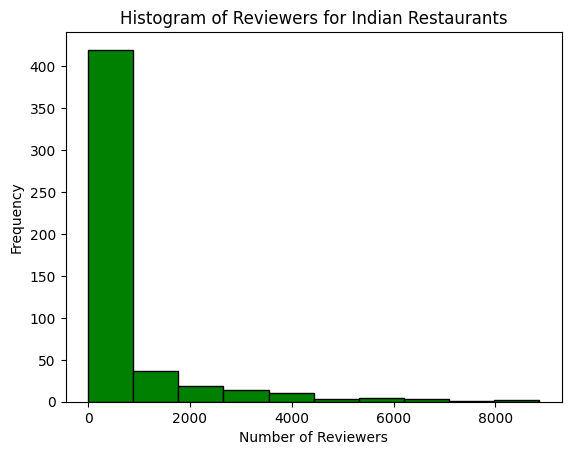

In [131]:
plt.hist(indian_df['Reviewers'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Reviewers for Indian Restaurants')
plt.xlabel('Number of Reviewers')
plt.ylabel('Frequency')
plt.show()


# Compare the number of reviewers for different food types in Singapore

In [133]:
# Ensure food type and city are lowercase for matching
raw_df['FoodType'] = raw_df['FoodType'].str.lower()
raw_df['City'] = raw_df['City'].str.lower()

# Filter only for Singapore and selected cuisines
filtered_df = raw_df[
    (raw_df['City'] == 'singapore') &
    (raw_df['FoodType'].isin(['indian', 'chinese', 'korean', 'japanese']))
]

# Group and sum reviewers
reviewer_counts = filtered_df.groupby('FoodType')['Reviewers'].sum().sort_values(ascending=False)

print(reviewer_counts)


FoodType
chinese     409744
indian      334950
japanese     81151
korean       45769
Name: Reviewers, dtype: int64


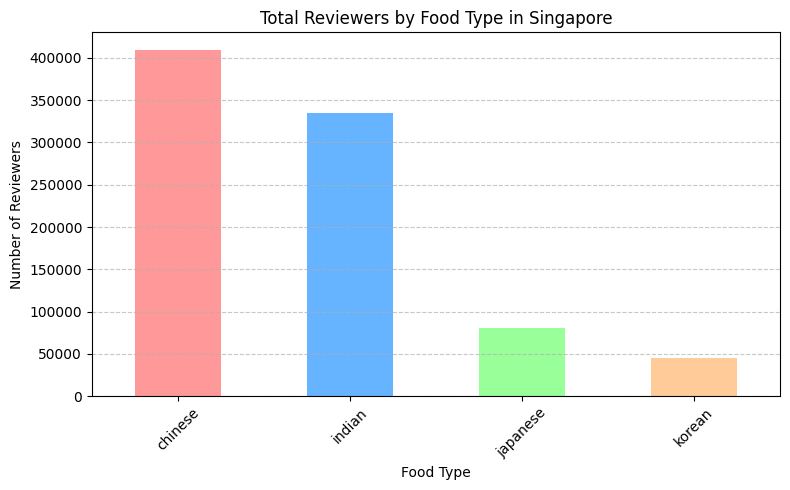

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
reviewer_counts.plot(kind='bar', color=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title('Total Reviewers by Food Type in Singapore')
plt.xlabel('Food Type')
plt.ylabel('Number of Reviewers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Top 10 highest rated restaurants

In [142]:
# Sort by AverageRating (descending) and then by number of Reviewers (optional)
top_10 = raw_df.sort_values(by=['AverageRating', 'Reviewers'], ascending=[False, False]).head(10)

# Display the result
print(top_10[['CompleteStoreName', 'FoodType', 'AverageRating', 'Reviewers']])


                  CompleteStoreName       FoodType  AverageRating  Reviewers
4791        4Fingers Crispy Chicken  fried chicken            5.0      13442
1156          Adam's Corner Seafood      malaysian            5.0      11164
4954                     Pastamania          pasta            5.0      10035
7182             Tenderfresh Xpress        western            5.0       9718
7642          Sin Heng Kee Porridge       porridge            5.0       9668
5894            Ten Points Porridge       porridge            5.0       9010
6059  Zamas River Valley Restaurant         indian            5.0       8860
6531     Tenderbest Makcik Tuckshop        western            5.0       7938
5964                  Zoul's Corner     indonesian            5.0       7917
6023            Tenderfresh Classic        western            5.0       7707


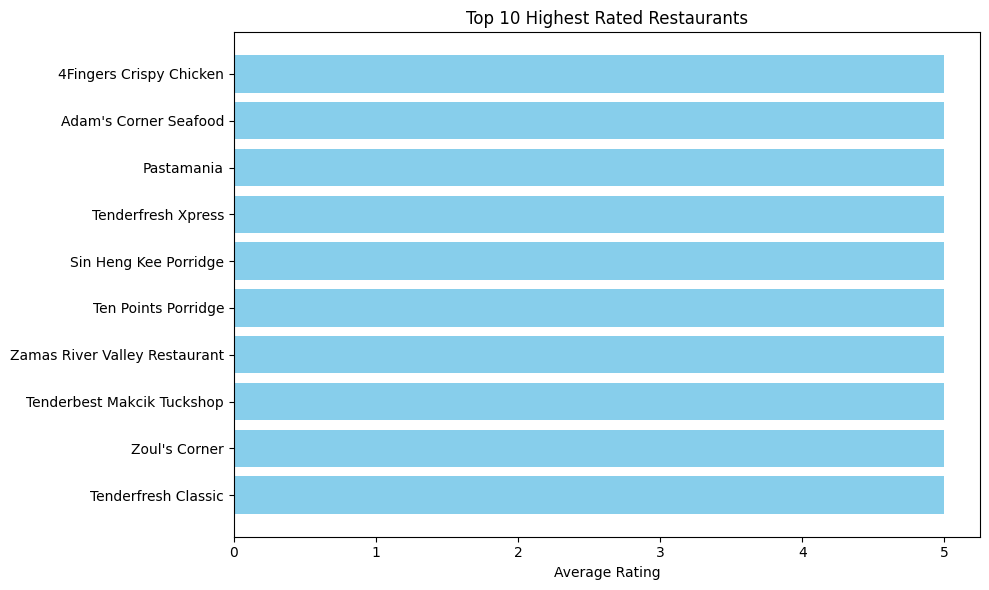

In [143]:
plt.figure(figsize=(10, 6))
plt.barh(
    top_10['CompleteStoreName'],
    top_10['AverageRating'],
    color='skyblue'
)
plt.xlabel('Average Rating')
plt.title('Top 10 Highest Rated Restaurants')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


# From top rating only Indian Food

In [144]:
# Step 1: Filter Indian food from full dataset
indian_df = raw_df[raw_df['FoodType'].str.lower() == 'indian']

# Step 2: Sort by rating and reviewers, then get top 10
top_10_indian = indian_df.sort_values(by=['AverageRating', 'Reviewers'], ascending=[False, False]).head(10)

# Step 3: Show result
print(top_10_indian[['CompleteStoreName', 'AverageRating', 'Reviewers']])


                  CompleteStoreName  AverageRating  Reviewers
6059  Zamas River Valley Restaurant            5.0       8860
6037           New Rezki Restaurant            5.0       7574
6026           Al Afrose Restaurant            5.0       6316
7762            Thohirah Restaurant            5.0       5428
6793                         Haji S            5.0       4767
4876                       Brinda's            5.0       4526
6450                             An            5.0       4404
6449                             Al            5.0       4349
4893                        Marhaba            5.0       4326
2125                    Ali's Prata            5.0       3258


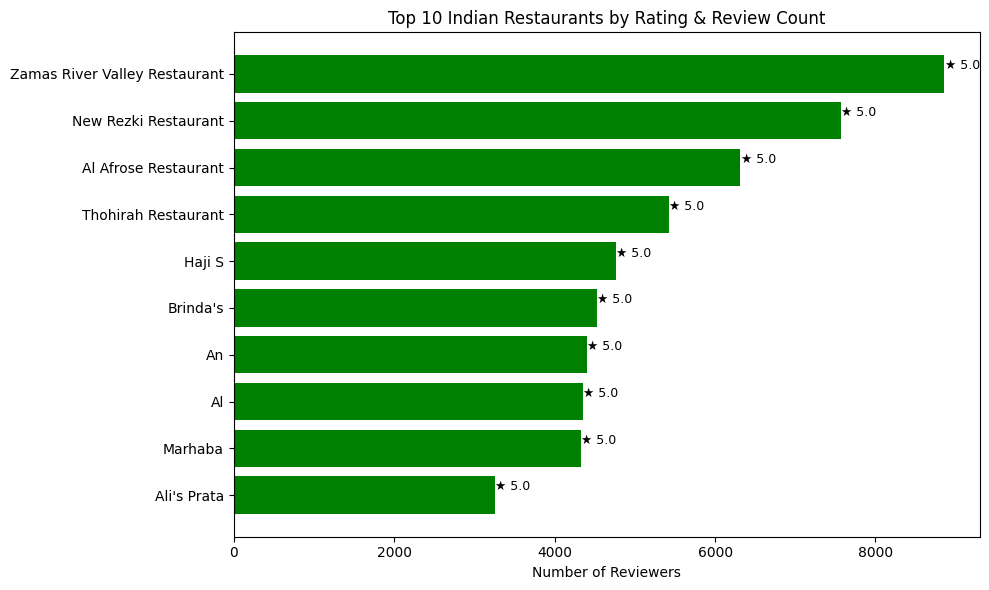

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(
    top_10_indian['CompleteStoreName'],
    top_10_indian['Reviewers'],
    color='green'
)

# Annotate bars with rating
for bar, rating in zip(bars, top_10_indian['AverageRating']):
    plt.text(bar.get_width() + 2, bar.get_y() + 0.3, f'★ {rating}', fontsize=9)

plt.xlabel('Number of Reviewers')
plt.title('Top 10 Indian Restaurants by Rating & Review Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Top 3 most reliable food types

In [149]:
# Step 1: Make sure city and food type are lowercase for consistency
raw_df['City'] = raw_df['City'].str.lower()
raw_df['FoodType'] = raw_df['FoodType'].str.lower()

# Step 2: Filter only Singapore restaurants
sg_df = raw_df[raw_df['City'] == 'singapore']

# Step 3: Group by FoodType and calculate average rating and total reviewers
reliability_df = (
    sg_df.groupby('FoodType')
    .agg({
        'AverageRating': 'mean',
        'Reviewers': 'sum'
    })
    .reset_index()
)

# Step 4: Filter food types with a decent number of reviewers (e.g., > 100)
reliability_df = reliability_df[reliability_df['Reviewers'] > 100]

# Step 5: Sort by average rating (descending) and reviewers (descending)
reliable_top3 = reliability_df.sort_values(
    by=['AverageRating', 'Reviewers'],
    ascending=[False, False]
).head(3)

# Step 6: Display result
print(reliable_top3)


     FoodType  AverageRating  Reviewers
22      halal            5.0        355
24  ice cream            5.0        199
17  fish soup            5.0        102


In [150]:
import pandas as pd

data = {
    'FoodType': ['halal', 'ice cream', 'fish soup'],
    'AverageRating': [5.0, 5.0, 5.0],
    'Reviewers': [355, 199, 102]
}

df_top = pd.DataFrame(data)


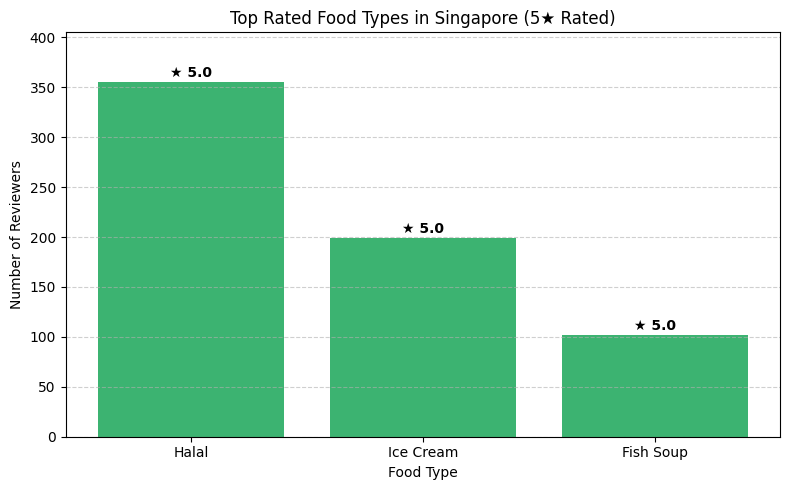

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(df_top['FoodType'].str.title(), df_top['Reviewers'], color='mediumseagreen')

# Annotate each bar with the AverageRating
for bar, rating in zip(bars, df_top['AverageRating']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'★ {rating}', ha='center', fontsize=10, fontweight='bold')

plt.title('Top Rated Food Types in Singapore (5★ Rated)')
plt.xlabel('Food Type')
plt.ylabel('Number of Reviewers')
plt.ylim(0, max(df_top['Reviewers']) + 50)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [152]:
# Filter original DataFrame for matching 5★ rows in Singapore
filtered_stores = raw_df[
    (raw_df['City'].str.lower() == 'singapore') &
    (raw_df['FoodType'].isin(['halal', 'ice cream', 'fish soup'])) &
    (raw_df['AverageRating'] == 5.0)
][['FoodType', 'CompleteStoreName', 'AverageRating', 'Reviewers']]

# Display
for food_type in filtered_stores['FoodType'].unique():
    print(f"\n🍽️ {food_type.title()} Restaurants:")
    display(filtered_stores[filtered_stores['FoodType'] == food_type])



🍽️ Ice Cream Restaurants:


,FoodType,CompleteStoreName,AverageRating,Reviewers
297,ice cream,Pang Zi Durian And Ice Cream House,5.0,114
3474,ice cream,The Ice Cream store,5.0,8
7831,ice cream,Pika Poka Gelato,5.0,77



🍽️ Halal Restaurants:


,FoodType,CompleteStoreName,AverageRating,Reviewers
3228,halal,D,5.0,355



🍽️ Fish Soup Restaurants:


,FoodType,CompleteStoreName,AverageRating,Reviewers
8249,fish soup,Hong Yun Fish Soup And Carrot Cake,5.0,102


# Save the cleaned dataset

In [153]:
# Step 1: Remove rows where 'FoodType' is null
cleaned_df = raw_df.dropna(subset=['FoodType'])

# Step 2: Save the cleaned dataset to a new CSV file
cleaned_df.to_csv('cleaned_foodpanda_dataset.csv', index=False)
